In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
data=pd.read_csv('E:/dat/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
print(data.shape)

(50000, 2)


In [6]:
!pip install nltk

In [7]:
# required library for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from keras_preprocessing.text import one_hot
from keras_preprocessing.text import Tokenizer

In [8]:
# required library for model building
from keras_preprocessing.sequence import pad_sequences
from keras.layers.core import Activation,Dropout,Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import GlobalMaxPooling1D

In [9]:
## extracting the paticular review
data.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [10]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt

In [12]:
## visualization of sentiment
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

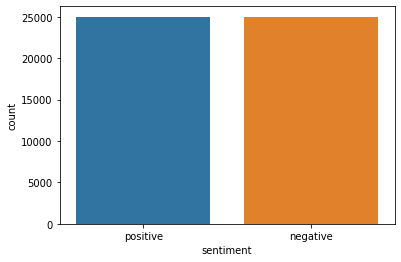

In [13]:
sns.countplot(x='sentiment',data=data)

In [14]:
plt.savefig('sentiment_png.png')

<Figure size 432x288 with 0 Axes>

## Data Preprocessing

In [15]:
## Here using some regex epression for text preprocessing

def text_preprocessed(sen):
    
    #remove the html tags
    #re.sub – It used to search and replace in string
    sentence=remove_tags(sen)
    
    #remove punctuation and numbers
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    
    #remove single character
    sentence= re.sub(r"\s+[a-zA-Z]\s+", " ", sentence)
    
    #removing mutiple spaces
    sentence=re.sub(r"\s+"," ", sentence)
    
    return sentence    

In [16]:
Tag_re=re.compile(r'<[^>]+>')

def remove_tags(text):
    return Tag_re.sub('',text)

In [17]:
X=[]
sentences=list(data['review'])
for sen in sentences:
    X.append(text_preprocessed(sen))

In [18]:
## Before text preprocessing
data['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [19]:
## After text preprocessing
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [20]:
Y=data['sentiment']
Y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [21]:
## converting text data into numerical data of target variable

Y=np.array(list(map(lambda x:1 if x=='positive' else 0 ,Y)))

In [22]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
!pip install sklearn

In [24]:
## data separation
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
## spliting sentences into token
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [27]:
len(tokenizer.word_index)

92387

In [40]:
## vacal_size (each sentences should have 100 words for that we will using pad sequences to moniter that)

vacal_size=len(tokenizer.word_index)+1
maxlen=100

X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

In [41]:
import os
from numpy import asarray
from  numpy  import array
from numpy import zeros

### Usig pre-trained model for word embedding

In [42]:
embeddings_dictionary=dict()
glove_file=open('Downloads/glove.6B.100d.txt',encoding='utf8')

for line in glove_file:
    records=line.split()
    word=records[0]
    vector_dimensions=asarray(records[1:],dtype='float32')
    embeddings_dictionary[word]=vector_dimensions
glove_file.close()

In [43]:
embedding_matrix=zeros((vacal_size,100))
for word,index in tokenizer.word_index.items():
    embedding_vector=embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [32]:
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('of', 3), ('to', 4), ('is', 5), ('it', 6), ('in', 7), ('this', 8), ('that', 9), ('was', 10), ('as', 11), ('movie', 12), ('for', 13), ('with', 14), ('but', 15), ('film', 16), ('you', 17), ('on', 18), ('not', 19), ('he', 20), ('are', 21), ('his', 22), ('have', 23), ('one', 24), ('be', 25), ('all', 26), ('at', 27), ('they', 28), ('by', 29), ('an', 30), ('who', 31), ('so', 32), ('from', 33), ('like', 34), ('there', 35), ('or', 36), ('just', 37), ('her', 38), ('out', 39), ('if', 40), ('about', 41), ('has', 42), ('what', 43), ('some', 44), ('good', 45), ('can', 46), ('more', 47), ('when', 48), ('very', 49), ('she', 50), ('up', 51), ('no', 52), ('time', 53), ('even', 54), ('my', 55), ('would', 56), ('which', 57), ('only', 58), ('story', 59), ('really', 60), ('see', 61), ('their', 62), ('had', 63), ('me', 64), ('well', 65), ('we', 66), ('were', 67), ('than', 68), ('much', 69), ('bad', 70), ('get', 71), ('other', 72), ('been', 73), ('people', 74), ('do', 75)

### Creating model

In [44]:
model= Sequential()
embedding_layer=Embedding(vacal_size,100,weights=[embedding_matrix],input_length=maxlen ,trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
### Compiling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 80008     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 9,334,749
Trainable params: 80,049
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [46]:
history=model.fit(X_train,Y_train,batch_size=128, epochs=5, verbose=1,validation_split=0.20)

Epoch 1/5
250/250 [==============================] - 2s 7ms/step - loss: 0.6765 - acc: 0.5890 - val_loss: 0.6375 - val_acc: 0.7021
Epoch 2/5
250/250 [==============================] - 2s 7ms/step - loss: 0.5928 - acc: 0.7268 - val_loss: 0.5733 - val_acc: 0.7370
Epoch 3/5
250/250 [==============================] - 2s 6ms/step - loss: 0.5283 - acc: 0.7752 - val_loss: 0.5600 - val_acc: 0.7340
Epoch 4/5
250/250 [==============================] - 2s 6ms/step - loss: 0.4877 - acc: 0.7954 - val_loss: 0.5615 - val_acc: 0.7383
Epoch 5/5
250/250 [==============================] - 2s 7ms/step - loss: 0.4623 - acc: 0.8088 - val_loss: 0.5633 - val_acc: 0.7395


In [47]:
score=model.evaluate(X_test,Y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.5676 - acc: 0.7382


In [48]:
print('Test Score :-',score[0])
print('Test Accuracy :-',score[1])

Test Score :- 0.5676124095916748
Test Accuracy :- 0.7382000088691711


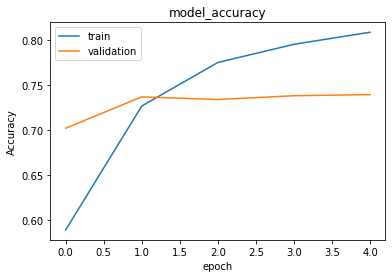

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


In [58]:
plt.savefig('model_accuarcy_png.png')

<Figure size 432x288 with 0 Axes>

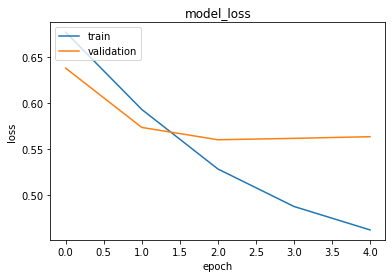

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [60]:
plt.savefig('model_loss_png.png')

<Figure size 432x288 with 0 Axes>

In [65]:
### testing with some sentences,to get sentiment in positive or negitive
sentiment_statement=input('Enter the reviews :- ')
sentiment_statement=text_preprocessed(sentiment_statement)
print(sentiment_statement)
sentences=[]
sentences.append(sentiment_statement)
sent=tokenizer.texts_to_sequences(sentences)
print(sent)

sent=pad_sequences(sent,padding='post',maxlen=maxlen)
print(sent)

(model.predict(sent) > 0.5).astype('int32')

Enter the reviews :- Love Mocktail 2 has some of what Love Mocktail fans want, but it also touches upon some deeper emotional issues. This is where most of them hit the right chords, while some miss it.
Love Mocktail has some of what Love Mocktail fans want but it also touches upon some deeper emotional issues This is where most of them hit the right chords while some miss it 
[[108, 42, 44, 3, 43, 108, 456, 179, 15, 6, 77, 2519, 660, 44, 2727, 862, 1223, 8, 5, 111, 85, 3, 88, 591, 1, 200, 134, 44, 674, 6]]
[[ 108   42   44    3   43  108  456  179   15    6   77 2519  660   44
  2727  862 1223    8    5  111   85    3   88  591    1  200  134   44
   674    6    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    

array([[1]])

### From, this model we are able to predict whether movie reviews is good(positive) or not good(negative)